In [1]:
# import required packages
from selenium import webdriver
from bs4 import BeautifulSoup
import time
# provide the url of the channel whose data you want to fetch
urls = [
	'https://www.youtube.com/@GeeksforGeeksVideos/videos'
]
driver = webdriver.Chrome()
def scroll_down_all(driver, pause_sec=1):

# Get scroll height
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    # print("happened")
    while True:
        # print("happend")
    # Scroll down
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

        
        time.sleep(pause_sec)

        # After scroll down, get current height.
        new_height = driver.execute_script("return document.documentElement.scrollHeight")

        if new_height == last_height:
            break

        last_height = new_height


driver.get('{}/videos?view=0&sort=p&flow=grid'.format(urls[0]))
scroll_down_all(driver,5)
content = driver.page_source.encode('utf-8').strip()
soup = BeautifulSoup(content, 'lxml')	
		


# <span class="inline-metadata-item style-scope ytd-video-meta-block">
                    #   5 days ago
                    #  </span>

In [2]:
import pandas as pd
title = []
views_temp = soup.findAll('span',class_='inline-metadata-item style-scope ytd-video-meta-block')
views = []
cnt = 0
for ele in views_temp:
    if(cnt == 1) :
        cnt = (cnt+1)%2
    else :
        views.append(ele.text)
        cnt = (cnt+1)%2
length = []
# Resolve this issue
length_temp = soup.findAll('span',attrs={"id" : "text"})
link_temp= soup.findAll('a',attrs={"id" : 'video-title-link',"class":"yt-simple-endpoint focus-on-expand style-scope ytd-rich-grid-media"})
link = []
cnt = 0
for ele in length_temp:
    if(cnt == 0):
        length.append(ele.text)
    cnt = (cnt+1)%2
for i in range(len(length)):
    length[i] = length[i].strip()
for ele in link_temp:
    title.append(ele.text)
    link.append(ele['href'])
youtube_string = "www.youtube.com"
link = [youtube_string + s for s in link]
print(len(title))
print(len(views))
print(len(length))
print(len(link))

1686
1686
1686
1686


In [3]:
# Creating an object
# Problem 2
data = {"videos_title" : title , "views" : views , "length" : length , "link" : link}
df = pd.DataFrame(data)

df.head()

,videos_title,views,length,link
0,All Your Queries Answered | DSA to Development...,665 views,3:47,www.youtube.com/watch?v=kHBzDvj3D2U
1,10 TIPS and TRICKS to Crack Internships and Pl...,679 views,9:53,www.youtube.com/watch?v=2QDMIZGeIC4
2,Complete School Guide for CBSE | Free Resource...,508 views,0:56,www.youtube.com/watch?v=1ECMlxC6jbs
3,Master System Design | GeeksforGeeks,7.2K views,0:46,www.youtube.com/watch?v=vjWLZYeqiN8
4,"Unraveling the Geek-a-thon: The What, How, and...",440 views,45:44,www.youtube.com/watch?v=6e0v_NhsFMQ


# 🐼 Pandas Dataframe Creation 📊

## Problem Statement 🚀

2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link


## Solution  📝
✔️ Done


In [57]:
df2 = df.copy()

def custom_conversion(val):
    time = val.split(':')
    length = 0
    print(val)
    sz = len(time)
    for i in range(len(time)):
        length += (int(time[i])* pow(60,(sz-1)))
        sz = sz-1
    print(length)
    
    return length

column_to_sort = 'length'
df2[column_to_sort] = df2[column_to_sort].apply(lambda x: custom_conversion(x))


3:47
227
9:53
593
0:56
56
0:46
46
45:44
2744
1:29:21
5361
0:28
28
0:30
30
0:37
37
0:36
36
2:51
171
0:46
46
17:08
1028
0:10
10
2:47
167
0:56
56
0:43
43
8:50
530
12:14
734
0:37
37
1:26
86
5:40
340
0:35
35
0:37
37
9:48
588
10:48
648
0:52
52
1:39
99
1:35
95
0:38
38
28:45
1725
3:17
197
0:39
39
8:44
524
0:54
54
2:03
123
1:12
72
0:56
56
0:38
38
5:38
338
1:32
92
0:42
42
11:57
717
1:35
95
2:03
123
16:45
1005
3:42
222
0:25
25
31:37
1897
19:28
1168
31:56
1916
11:55
715
18:30
1110
1:05
65
0:47
47
0:31
31
35:45
2145
15:30
930
0:31
31
37:22
2242
0:26
26
3:30
210
1:52
112
6:55
415
15:06
906
2:41
161
1:02
62
3:58
238
0:46
46
7:19
439
0:32
32
0:26
26
5:40
340
0:21
21
0:15
15
0:49
49
1:05
65
0:41
41
2:50
170
0:44
44
27:52
1672
0:59
59
6:01
361
32:16
1936
0:59
59
0:12
12
0:18
18
1:24
84
30:45
1845
6:02
362
3:11
191
8:29
509
2:44
164
3:57
237
3:46
226
2:28
148
2:21
141
3:00
180
3:28
208
3:01
181
5:10
310
12:21
741
0:51
51
21:35
1295
11:21
681
1:14
74
0:49
49
0:43
43
0:36
36
0:37
37
0:41
41
0:28
28
31:07
1

In [58]:
print(sorted_df['videos_title'].head())

436     Complete Interview Preparation to Crack Coding...
1628                            Heap Sort | GeeksforGeeks
1627                           Quick Sort | GeeksforGeeks
245     Are You Prepared Enough? | GeeksforGeeks feat....
1630                       Insertion Sort | GeeksforGeeks
Name: videos_title, dtype: object


# 📊 Most Viewed Topics in the Past 6 Months

## Problem Statement 🚀

3. Name the most viewed topics in the past 6 months.

## Most Viewed Topics 👀

1. Creating Chatting Application in Android Studio
2. User Authentication and CRUD Operation with Firebase
3. DSA Self-Paced Course Preview
4. Data Analysis Masterclass | Geek-A-Thon
5. How to Make a News App in Android Studio?


In [59]:
df2

,videos_title,views,length,link
0,All Your Queries Answered | DSA to Development...,665 views,227,www.youtube.com/watch?v=kHBzDvj3D2U
1,10 TIPS and TRICKS to Crack Internships and Pl...,679 views,593,www.youtube.com/watch?v=2QDMIZGeIC4
2,Complete School Guide for CBSE | Free Resource...,508 views,56,www.youtube.com/watch?v=1ECMlxC6jbs
3,Master System Design | GeeksforGeeks,7.2K views,46,www.youtube.com/watch?v=vjWLZYeqiN8
4,"Unraveling the Geek-a-thon: The What, How, and...",440 views,2744,www.youtube.com/watch?v=6e0v_NhsFMQ
...,...,...,...,...
1681,Length of shortest chain to reach a target wor...,41K views,745,www.youtube.com/watch?v=6pIC20wCm20
1682,Binary Search | GeeksQuiz,188K views,453,www.youtube.com/watch?v=T2sFYY-fT5o
1683,Number of Triangles in an Undirected Graph | G...,18K views,524,www.youtube.com/watch?v=ChdNz1Ui1uc
1684,Write a program to print all permutations of a...,479K views,712,www.youtube.com/watch?v=AfxHGNRtFac


In [62]:
# Changing views

def custom_conversion(val):
    
    val = val.split()
    val = val[0]
    # print(val)
    consider = 1
    suffixes = {'K': 1000, 'M': 1000000 , 'B' : 1000000000 , 'T' : 1000000000000000}
    # print(val[:-1])
    # print(val)
    if(val[-1]>='0' and val[-1]<='9'):
        print(val[-1])
        print('ha')
        val = val
    else:
        consider = suffixes[val[-1]]
        val = val[:-1]
        
    return int(float(val)*consider)

column_to_sort = 'views'
df2['views_new_length'] = df2[column_to_sort].apply(lambda x: custom_conversion(x))



5
ha
9
ha
8
ha
0
ha
6
ha
1
ha
9
ha
8
ha
9
ha
7
ha
3
ha
1
ha
3
ha
1
ha
4
ha
1
ha
5
ha
8
ha
2
ha
5
ha
7
ha
5
ha
7
ha
2
ha
2
ha
2
ha
5
ha
2
ha
1
ha
3
ha
0
ha
0
ha
5
ha
1
ha
6
ha
4
ha
0
ha
9
ha
5
ha
2
ha
8
ha
5
ha
1
ha
8
ha
8
ha
9
ha
2
ha
8
ha
8
ha
3
ha
0
ha
2
ha
9
ha
9
ha
1
ha
5
ha
3
ha
2
ha
9
ha
8
ha
0
ha
5
ha
6
ha
9
ha
7
ha
7
ha
1
ha
0
ha
4
ha


,videos_title,views,length,link,views_new_length
0,All Your Queries Answered | DSA to Development...,665 views,227,www.youtube.com/watch?v=kHBzDvj3D2U,665
1,10 TIPS and TRICKS to Crack Internships and Pl...,679 views,593,www.youtube.com/watch?v=2QDMIZGeIC4,679
2,Complete School Guide for CBSE | Free Resource...,508 views,56,www.youtube.com/watch?v=1ECMlxC6jbs,508
3,Master System Design | GeeksforGeeks,7.2K views,46,www.youtube.com/watch?v=vjWLZYeqiN8,7200
4,"Unraveling the Geek-a-thon: The What, How, and...",440 views,2744,www.youtube.com/watch?v=6e0v_NhsFMQ,440


In [68]:
# For better understanding the graph we'll convert the length to minutes rather than second

df2['views_new_length'] = df2['views_new_length']/60

In [69]:
df2

,videos_title,views,length,link,views_new_length
0,All Your Queries Answered | DSA to Development...,665 views,227,www.youtube.com/watch?v=kHBzDvj3D2U,11.083333
1,10 TIPS and TRICKS to Crack Internships and Pl...,679 views,593,www.youtube.com/watch?v=2QDMIZGeIC4,11.316667
2,Complete School Guide for CBSE | Free Resource...,508 views,56,www.youtube.com/watch?v=1ECMlxC6jbs,8.466667
3,Master System Design | GeeksforGeeks,7.2K views,46,www.youtube.com/watch?v=vjWLZYeqiN8,120.000000
4,"Unraveling the Geek-a-thon: The What, How, and...",440 views,2744,www.youtube.com/watch?v=6e0v_NhsFMQ,7.333333
...,...,...,...,...,...
1681,Length of shortest chain to reach a target wor...,41K views,745,www.youtube.com/watch?v=6pIC20wCm20,683.333333
1682,Binary Search | GeeksQuiz,188K views,453,www.youtube.com/watch?v=T2sFYY-fT5o,3133.333333
1683,Number of Triangles in an Undirected Graph | G...,18K views,524,www.youtube.com/watch?v=ChdNz1Ui1uc,300.000000
1684,Write a program to print all permutations of a...,479K views,712,www.youtube.com/watch?v=AfxHGNRtFac,7983.333333


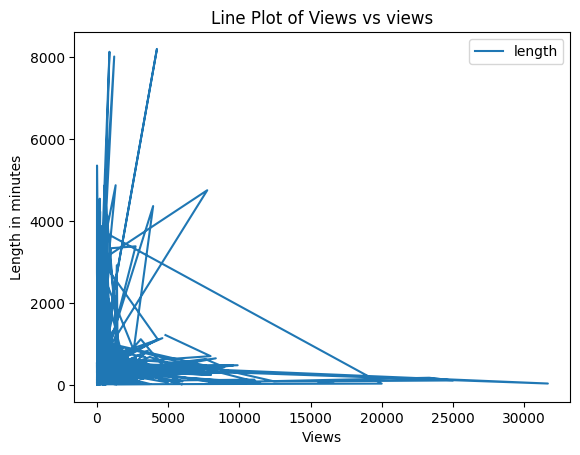

In [71]:
from matplotlib import pyplot as plt
# sorted_df = df2.sort_values(by=[column_to_sort,'views'],ascending = True)
# print(df2['views'])
df2.plot(x ='views_new_length' , y = 'length',kind = "line" )
plt.xlabel('Views')  # Set x-axis label
plt.ylabel('Length in minutes')  # Set y-axis label
plt.title('Line Plot of Views vs ' + column_to_sort)  # Set plot title
plt.show()

# Probelm 5

# 📊 Comparison Between Number of Views and Video Length

## Problem Statement 🚀

5. Make a comparison between the number of views and video length using a Graph.

## Solution 📝

Done above